
# ACUS302 - Instrumentación en Acústica y Vibraciones

## Práctica de Ecoacústica en Humedales Urbanos
**Magíster en Acústica y Vibraciones - Salida a terreno y análisis posterior**

Este cuadernillo guía la actividad completa: preparación en terreno, registro de audio, registro de metadatos, y un análisis básico para clasificar sonidos en **biofonía**, **antropofonía** y **geofonía**. Incluye celdas de código para cargar y visualizar grabaciones, y una plantilla de resultados.

> **Requisitos de Python (para análisis en casa):** `librosa`, `soundfile`, `numpy`, `matplotlib`, `pandas`.  
> Instala (una vez): `pip install librosa soundfile numpy matplotlib pandas scipy`.



## Objetivos de aprendizaje
- Comprender qué es un **humedal urbano** y por qué es relevante para el patrimonio sonoro de la ciudad, la biodiversidad y el bienestar de los ciudadanos.
- Practicar **grabación de paisajes sonoros** (5-10 min) con buenas prácticas de campo.
- Registrar **metadatos** mínimos para reproducibilidad (lugar, hora, clima, equipo, etc.).
- Realizar un **análisis ecoacústico básico**: espectrogramas, densidad espectral de potencia, y **clasificación por fuentes** (biofonía/antropofonía/geofonía).
- (Opcional) Identificar **aves** y **anfibios** si hubiese, por su canto y citar referencias consultadas.



## Ética, seguridad y permisos
- Respeta fauna y visitantes. **No** invadas nidos ni zonas frágiles; mantén distancia.
- Evita grabar conversaciones privadas; enfoca micrófonos al paisaje sonoro y no a personas.
- Mantén limpio el sitio.
- Seguridad del grupo: siempre en parejas, teléfono cargado, punto de encuentro y hora de retorno.
- Medidas de desplazamiento para apoyar a tus compañeros



## Equipo sugerido
- Grabadora Tascam, trípodo, tú propio teléfono para capturar imágenes, video y audio si es necesario, con app de grabación en **WAV** o **FLAC** (no MP3 si es posible), 44.1 o 48 kHz, 24/16 bits.
- GPS/Maps para coordenadas; libreta o notas.
- Ropa acorde al clima, agua, gorro.

## Protocolo de campo (resumen)
1. **Selecciona punto** (Cercano / Medio / Lejano al borde del humedal).
2. Anota metadatos.
3. Antes de grabar: 10 s de **silencio** para "calibrar" el ambiente.
4. **Clap** o palmada breve (marca de sincronía) y comienza la **grabación de 5–10 minutos**.
5. Mantén el micrófono **estable**; apunta a hábitat de interés (juncos, espejo de agua, arbolado).
6. Al terminar, añade observaciones: hora, estación del año, clima, tráfico, aves vistas, etc.


## Formulario de metadatos (rellenar una fila por archivo grabado)
Ejecuta la celda siguiente para generar/actualizar un CSV `metadatos_campo.csv`. Puedes re-ejecutarla para añadir más filas.


In [2]:

import pandas as pd
from datetime import datetime
from pathlib import Path

meta_path = Path("metadatos_campo.csv")
cols = ["archivo", "fecha_hora_local", "humedal", "punto", "coord_lat", "coord_lon",
        "dispositivo", "microfono", "fs_hz", "bits", "duracion_min_aprox",
        "clima", "viento", "observaciones"]

print("Completa los metadatos del registro actual:")
row = {}
row["archivo"] = input("Nombre del archivo de audio (incluye extensión): ").strip()
row["fecha_hora_local"] = input("Fecha/hora local (YYYY-MM-DD HH:MM, dejar vacío=ahora): ").strip() or datetime.now().strftime("%Y-%m-%d %H:%M")
row["humedal"] = input("Nombre del humedal: ").strip()
row["punto"] = input("Punto (Cercano/Medio/Lejano u otro): ").strip()
row["coord_lat"] = input("Latitud (decimal, opcional): ").strip()
row["coord_lon"] = input("Longitud (decimal, opcional): ").strip()
row["dispositivo"] = input("Dispositivo/APP: ").strip()
row["microfono"] = input("Micrófono (integrado/externo/modelo): ").strip()
row["fs_hz"] = input("Frecuencia de muestreo Hz (ej. 44100): ").strip()
row["bits"] = input("Bits (16/24): ").strip()
row["duracion_min_aprox"] = input("Duración aprox (min): ").strip()
row["clima"] = input("Clima (despejado/nublado/lluvia): ").strip()
row["viento"] = input("Viento (calmo/brisa/fuerte): ").strip()
row["observaciones"] = input("Observaciones relevantes: ").strip()

df_new = pd.DataFrame([row], columns=cols)
if meta_path.exists():
    df = pd.read_csv(meta_path)
    df = pd.concat([df, df_new], ignore_index=True)
else:
    df = df_new

df.to_csv(meta_path, index=False)
print(f"✅ Fila agregada a {meta_path.resolve()}")
df.tail(5)


Completa los metadatos del registro actual:


Nombre del archivo de audio (incluye extensión):  acus302.wav
Fecha/hora local (YYYY-MM-DD HH:MM, dejar vacío=ahora):  2025-09-03
Nombre del humedal:  Centro de Humedales Río Cruces
Punto (Cercano/Medio/Lejano u otro):  Orilla de monitoreo aves
Latitud (decimal, opcional):  -39°43'16
Longitud (decimal, opcional):  -73°13'59
Dispositivo/APP:  Tascam
Micrófono (integrado/externo/modelo):  xxx
Frecuencia de muestreo Hz (ej. 44100):  44100
Bits (16/24):  24
Duración aprox (min):  5 minutos
Clima (despejado/nublado/lluvia):  nublado
Viento (calmo/brisa/fuerte):  medio
Observaciones relevantes:  aves al atardecer


✅ Fila agregada a /Users/vpoblete/Documents/20230208_vpoblete/20250903_fausto_2/metadatos_campo.csv


,archivo,fecha_hora_local,humedal,punto,coord_lat,coord_lon,dispositivo,microfono,fs_hz,bits,duracion_min_aprox,clima,viento,observaciones
0,acus302.wav,2025-09-03,Centro de Humedales Río Cruces,Orilla de monitoreo aves,-39°43'16,-73°13'59,Tascam,xxx,44100,24,5 minutos,nublado,medio,aves al atardecer



## Análisis básico (en casa)
A continuación, carga uno o más WAV/FLAC y genera:
- **Forma de onda**
- **Espectrograma** (STFT)
- **Densidad espectral de potencia** (PSD, método Welch)
- Un **filtro pasa-altos** (opcional) para atenuar ruido de baja frecuencia (viento/tráfico)
- Tabla de **segmentos** etiquetados (biofonía/antropofonía/geofonía)

> Sube tus audios a la misma carpeta del notebook o ajusta la ruta.


In [3]:

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import spectrogram, welch, butter, filtfilt

plt.rcParams.update({"figure.figsize": (10, 4)})

def read_audio(path, target_sr=None, mono=True):
    """Lee audio con soundfile; si target_sr es None deja fs original."""
    x, fs = sf.read(path, always_2d=False)
    if hasattr(x, "ndim") and x.ndim > 1 and mono:
        x = x.mean(axis=1)
    if target_sr and target_sr != fs:
        try:
            from scipy.signal import resample_poly
            import math
            g = math.gcd(int(target_sr), int(fs))
            up, down = target_sr // g, fs // g
            x = resample_poly(x, up, down)
            fs = target_sr
        except Exception as e:
            print("No pude remuestrear; continúo con fs original:", fs, "Hz")
    return x, fs

def highpass(x, fs, fc=300.0, order=4):
    b, a = butter(order, fc/(fs/2), btype="highpass")
    return filtfilt(b, a, x)


In [4]:

def plot_waveform(x, fs, title="Waveform"):
    t = np.arange(len(x)) / fs
    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

def plot_spectrogram(x, fs, nperseg=2048, noverlap=1024, fmax=None, title="Espectrograma"):
    f, t, Sxx = spectrogram(x, fs=fs, nperseg=nperseg, noverlap=noverlap, scaling="spectrum", mode="magnitude")
    if fmax is not None:
        idx = f <= fmax
        f, Sxx = f[idx], Sxx[idx, :]
    Sxx_db = 10*np.log10(Sxx + 1e-12)
    plt.figure(figsize=(10, 4.5))
    plt.pcolormesh(t, f, Sxx_db, shading="auto")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Frecuencia (Hz)")
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label("dB")
    plt.tight_layout()
    plt.show()

def plot_psd(x, fs, nperseg=2048, title="PSD (Welch)"):
    f, Pxx = welch(x, fs=fs, nperseg=nperseg)
    plt.figure()
    plt.semilogy(f, Pxx)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("PSD")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()



### 1) Cargar un archivo de audio
Escribe el nombre del archivo (WAV/FLAC) que grabaste.


Duración: 5.9 s | fs = 44100 Hz


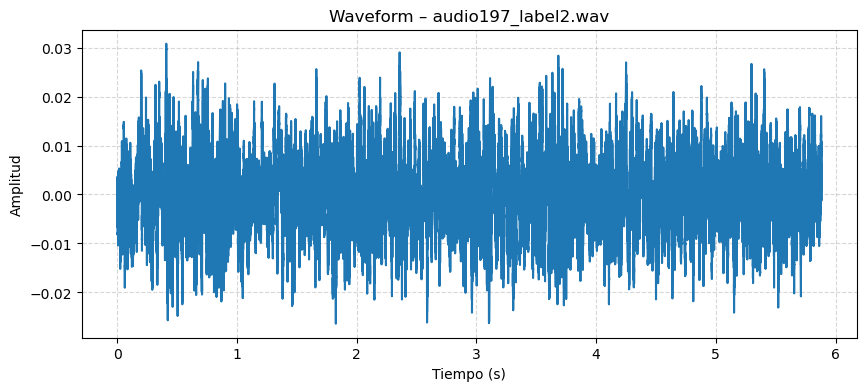

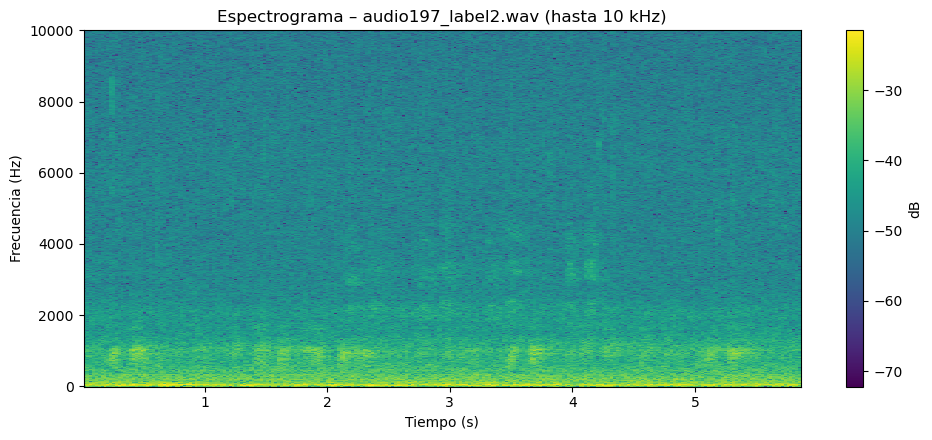

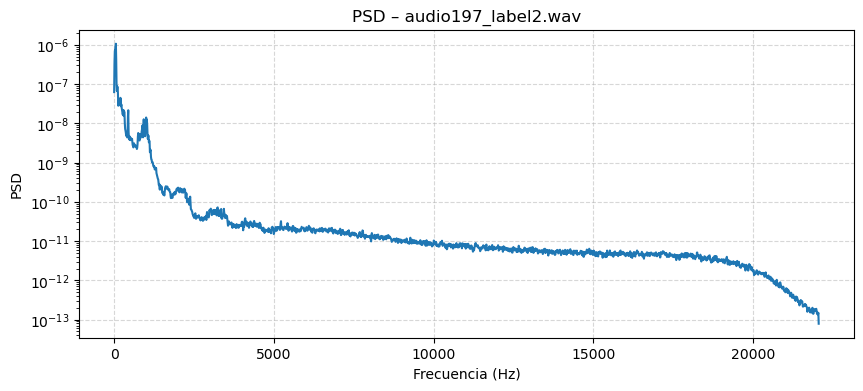

In [6]:

audio_file = "audio197_label2.wav"  # <- cambia esto
x, fs = read_audio(audio_file, target_sr=None)
print(f"Duración: {len(x)/fs:.1f} s | fs = {fs} Hz")
plot_waveform(x, fs, title=f"Waveform – {audio_file}")
plot_spectrogram(x, fs, nperseg=2048, noverlap=1024, fmax=10000, title=f"Espectrograma – {audio_file} (hasta 10 kHz)")
plot_psd(x, fs, nperseg=4096, title=f"PSD – {audio_file}")



### 2) (Opcional) Filtro pasa-altos para reducir ruido de baja frecuencia


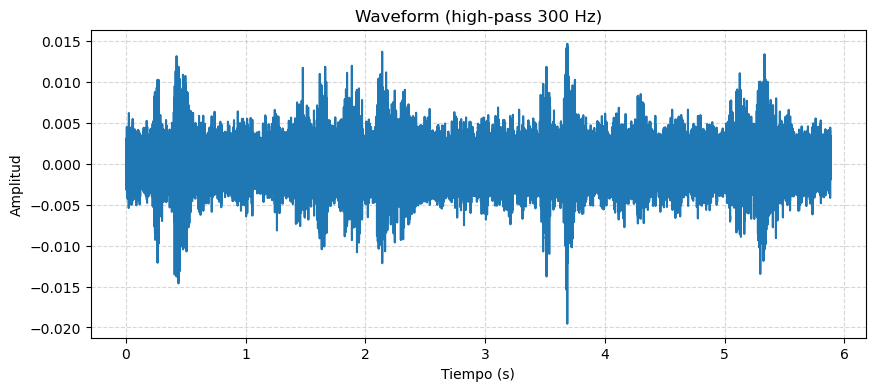

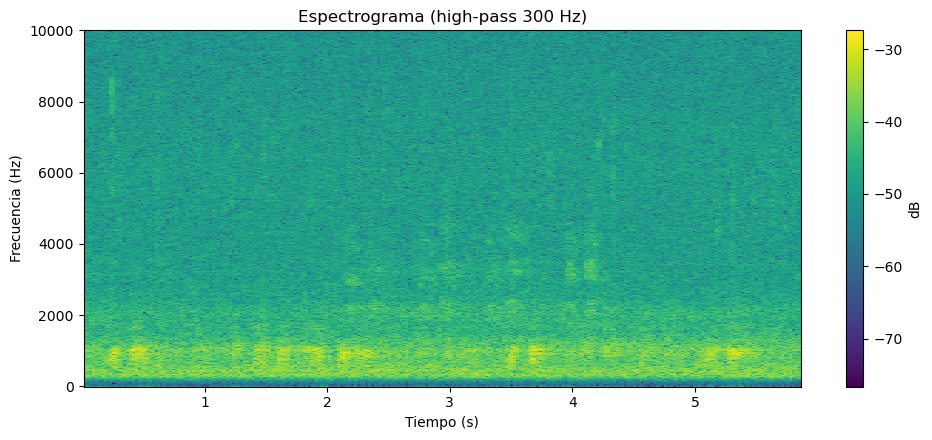

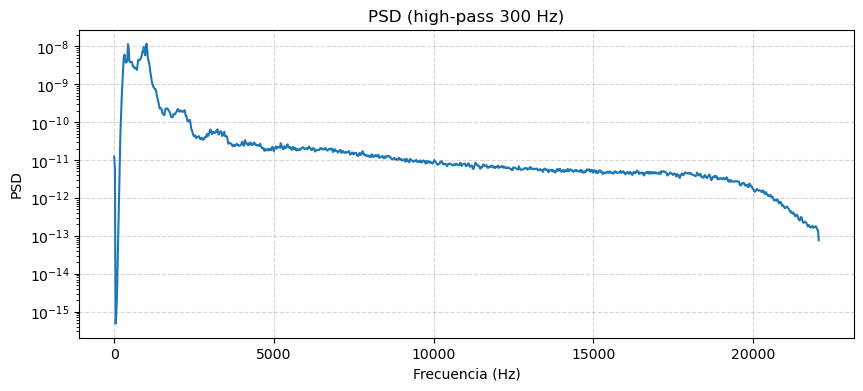

In [7]:

x_hp = highpass(x, fs, fc=300.0, order=4)
plot_waveform(x_hp, fs, title="Waveform (high-pass 300 Hz)")
plot_spectrogram(x_hp, fs, fmax=10000, title="Espectrograma (high-pass 300 Hz)")
plot_psd(x_hp, fs, title="PSD (high-pass 300 Hz)")



## Etiquetado de segmentos (biofonía/antropofonía/geofonía)
Usa la siguiente celda para crear una tabla simple con intervalos de interés.  
**Criterio de ejemplo:** marca segmentos cortos (por ejemplo, 2–5 s) donde se distinga claramente una fuente.

- **Biofonía:** aves, insectos, anfibios.  
- **Antropofonía:** tráfico, voces lejanas, maquinaria.  
- **Geofonía:** viento, agua (oleaje, corriente), lluvia.


In [8]:

import pandas as pd
from pathlib import Path

anot_path = Path("anotaciones_segmentos.csv")
cols = ["archivo", "t_inicio_s", "t_fin_s", "clase", "nota"]
print("Añade una fila (enter para omitir campo opcional):")
row = {}
row["archivo"] = input("Archivo (igual a audio_file): ").strip()
row["t_inicio_s"] = float(input("Inicio (s): ").strip())
row["t_fin_s"] = float(input("Fin (s): ").strip())
row["clase"] = input("Clase (biofonia/antropofonia/geofonia): ").strip().lower()
row["nota"] = input("Nota (especie/observación): ").strip()

df_new = pd.DataFrame([row], columns=cols)
if anot_path.exists():
    df = pd.read_csv(anot_path)
    df = pd.concat([df, df_new], ignore_index=True)
else:
    df = df_new
df.to_csv(anot_path, index=False)
print(f"✅ Fila agregada a {anot_path.resolve()}")
df.tail(10)


Añade una fila (enter para omitir campo opcional):


Archivo (igual a audio_file):  audio197_label2.wav
Inicio (s):  0.12
Fin (s):  0.34
Clase (biofonia/antropofonia/geofonia):  queltehue
Nota (especie/observación):  soleado


✅ Fila agregada a /Users/vpoblete/Documents/20230208_vpoblete/20250903_fausto_2/anotaciones_segmentos.csv


,archivo,t_inicio_s,t_fin_s,clase,nota
0,audio197_label2.wav,0.12,0.34,queltehue,soleado



### 3) (Opcional) Exportar segmentos a WAV
Para escuchar/compartir pequeños fragmentos (útil al identificar aves).


In [9]:

import numpy as np
import soundfile as sf

def export_segment(x, fs, t0, t1, out_wav):
    i0 = max(0, int(t0*fs))
    i1 = min(len(x), int(t1*fs))
    seg = x[i0:i1]
    sf.write(out_wav, seg, fs)
    print("Guardado:", out_wav, "| dur:", len(seg)/fs, "s")

# ejemplo:
export_segment(x, fs, t0=1.0, t1=4.0, out_wav="segmento_1_4s.wav")


Guardado: segmento_1_4s.wav | dur: 3.0 s



## Guía para identificación de aves (ideas)
- Repite la **escucha activa** de los segmentos con mejor relación señal/ruido.
- Observa en el espectrograma: **contorno**, **repetición**, **banda de frecuencia** (por ejemplo, 2–5 kHz).
- Cruza con guías locales: listados de aves del humedal/ciudad, aplicaciones/catálogos de cantos.
- Reporta **certeza** de la identificación (alta/media/baja) y **fuente consultada**.

### Entrega (sugerida)
1. Metadatos (`metadatos_campo.csv`)
2. Tabla de segmentos (`anotaciones_segmentos.csv`)
3. 1–2 figuras por archivo (espectrograma con título y ejes legibles).
4. Cuadro resumen por archivo: % biofonía / antropofonía / geofonía (por tiempo etiquetado).



### 4) Resumen por clases (tiempo etiquetado)


In [11]:

import pandas as pd

def resumen_por_clase(anot_csv):
    df = pd.read_csv(anot_csv)
    df["dur_s"] = df["t_fin_s"] - df["t_inicio_s"]
    by = df.groupby(["archivo","clase"])["dur_s"].sum().reset_index()
    total = by.groupby("archivo")["dur_s"].sum().rename("total")
    out = by.merge(total, on="archivo")
    out["pct"] = 100 * out["dur_s"] / out["total"]
    piv = out.pivot(index="archivo", columns="clase", values="pct").fillna(0.0)
    return piv.round(1)

# ejemplo de uso:
resumen_por_clase("anotaciones_segmentos.csv")


clase,queltehue
archivo,
audio197_label2.wav,100.0
